In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sentencing_fips_pop2010 2.csv")

In [3]:
df.shape

(1354399, 43)

In [4]:
df_drug = df[df['statut'].str.match('893.*')== True]

In [5]:
df_drug.shape

(440656, 43)

In [6]:
df_drug.head()

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,ccimp,cjimp,spimp,primp,lsviol,rpviol,faviol,fips,state,pop_2010
7,7,DOMINIQUE,GAMBLE,19,1988-04-01,BLACK,MALE,pinellas,65.4,LUCE,...,NO,NO,YES,NO,4,0,0,12103,FL,916542.0
24,24,RICHARD,TUDOR,30,1975-12-14,WHITE,MALE,hillsborough,88.5,BATTLES,...,NO,NO,NO,YES,0,0,0,12057,FL,1229226.0
29,29,ANGELA,FIGUEROA,34,1977-10-27,WHITE,FEMALE,hillsborough,50.5,"FERNANDEZ,K",...,NO,NO,NO,YES,0,0,0,12057,FL,1229226.0
31,31,DARRIN,PHELPS,29,1980-01-09,WHITE,MALE,st. lucie,69.0,SCHACK,...,NO,NO,YES,NO,0,0,0,12111,FL,277789.0
45,45,TIMOTHY,DOUGLAS,31,1977-09-15,WHITE,MALE,highlands,135.6,ESTRADA,...,NO,NO,YES,NO,0,6,0,12055,FL,98786.0


In [7]:
[df_drug.columns]

[Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'dob', 'race', 'gender',
        'county', 'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
        'sentdte', 'sp_total_days', 'spyrs', 'spmths', 'spdays',
        'cj_total_days', 'cc_total_days', 'pr_total_days', 'enhanc', 'haboff',
        'habvio', 'life', 'vcc', 'prrpact', 'dornum', 'circuit', 'dispos',
        'docket', 'prioff', 'ccimp', 'cjimp', 'spimp', 'primp', 'lsviol',
        'rpviol', 'faviol', 'fips', 'state', 'pop_2010'],
       dtype='object')]

In [9]:
df_drug['enhanc'].value_counts()

NONE                436420
DT  1.5               4035
LEP 1.5                116
MVT 1.5                 37
CRIMINL GANG 1.5        23
DM. VIOLENCE 1.5        15
LEP 2.0                  6
LEP 2.5                  4
Name: enhanc, dtype: int64

In [13]:
df_drug['sp_total_days'].describe()

count    4.406560e+05
mean     2.565474e+02
std      9.625192e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.680603e+06
Name: sp_total_days, dtype: float64

<AxesSubplot:>

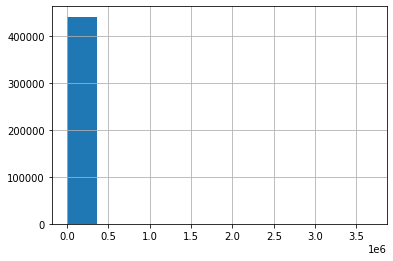

In [15]:
df_drug['sp_total_days'].hist()

In [16]:
import seaborn as sns

In [19]:
df_drug = df_drug[~((df_drug['spyrs']>=99)|(df_drug['life']=='Y'))]
df_drug.shape

(440562, 43)

In [22]:
df_drug['sp_cj_total_days'] = (df_drug['sp_total_days'])+(df_drug['cj_total_days'])
df_drug_clean = df_drug[~((df_drug['sp_cj_total_days']<=7) & (df_drug['totpts']>44))]
print('Removed rows: ',(len(df_drug)-len(df_drug_clean)))
print('Removed rows (% of total): ',"{:0.2%}".format((len(df_drug)-len(df_drug_clean))/len(df_drug)))

Removed rows:  24584
Removed rows (% of total):  5.58%


count    415978.000000
mean         34.252424
std          31.654686
min           0.000000
25%          18.600000
50%          28.000000
75%          39.600000
max       10001.000000
Name: totpts, dtype: object

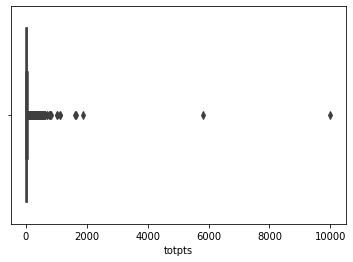

In [24]:
sns.boxplot(x=df_drug['totpts'])
df_drug_clean['totpts'].describe().apply(lambda x: format(x, 'f'))

count    415978.000000
mean        241.230743
std         798.639323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       34675.000000
Name: sp_total_days, dtype: object

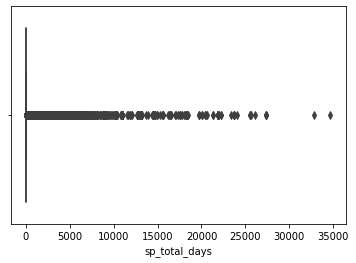

In [25]:
sns.boxplot(x=df_drug_clean['sp_total_days'])
df_drug_clean['sp_total_days'].describe().apply(lambda x: format(x, 'f'))

<AxesSubplot:ylabel='Density'>

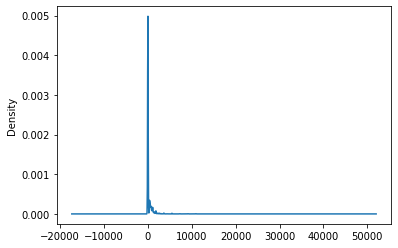

In [26]:
df_drug_clean['sp_total_days'].plot.density()

In [27]:
df_drug_clean[df_drug_clean['sp_total_days']<=365].shape

(326393, 44)

In [28]:
df_drug_clean[df_drug_clean['sp_total_days']>365].shape

(89585, 44)

In [29]:
89585/(326393+89585)

0.21535994692026983

# Specify County

In [31]:
df_drug_clean =df_drug_clean[df_drug_clean['county']=='pinellas']

<AxesSubplot:ylabel='Density'>

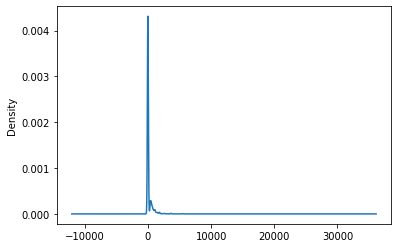

In [32]:
df_drug_clean['sp_total_days'].plot.density()

count    42267.000000
mean       174.882367
std        631.348873
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      24080.000000
Name: sp_total_days, dtype: object

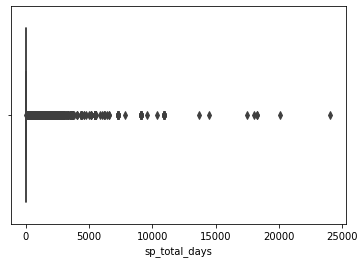

In [33]:
sns.boxplot(x=df_drug_clean['sp_total_days'])
df_drug_clean['sp_total_days'].describe().apply(lambda x: format(x, 'f'))

In [34]:
df_drug_clean[df_drug_clean['sp_total_days']<=365].shape

(34749, 44)

In [35]:
df_drug_clean[df_drug_clean['sp_total_days']>365].shape

(7518, 44)

In [36]:
7518/(34749+7518)

0.17786925970615375

In [68]:
df_drug_clean['sent_time_ind']=0
df_drug_clean.loc[df_drug_clean['sp_total_days']>365,'sent_time_ind']=1

In [69]:
df_drug_clean['sent_time_ind'].value_counts()

0    34749
1     7518
Name: sent_time_ind, dtype: int64

In [40]:
df_drug_clean['gender'].value_counts()

MALE      30131
FEMALE    12136
Name: gender, dtype: int64

In [41]:
df_drug_clean['gender_ind']=[1 if x=='MALE' else 0 for x in df_drug_clean['gender']]

In [42]:
df_drug_clean['clfely'].value_counts()

3RD DEGREE    33174
2ND DEGREE     7896
1ST DEGREE     1186
1ST/LIFE          7
LIFE              4
Name: clfely, dtype: int64

In [43]:
df_drug_clean = pd.concat([df_drug_clean,pd.get_dummies(df_drug_clean['clfely'], prefix='clfely')],axis=1)

In [63]:
df_drug_clean['sent_year']=df_drug_clean["sentdte"].str[:4]

In [46]:
df_drug_clean.columns

Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'dob', 'race', 'gender',
       'county', 'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
       'sentdte', 'sp_total_days', 'spyrs', 'spmths', 'spdays',
       'cj_total_days', 'cc_total_days', 'pr_total_days', 'enhanc', 'haboff',
       'habvio', 'life', 'vcc', 'prrpact', 'dornum', 'circuit', 'dispos',
       'docket', 'prioff', 'ccimp', 'cjimp', 'spimp', 'primp', 'lsviol',
       'rpviol', 'faviol', 'fips', 'state', 'pop_2010', 'sp_cj_total_days',
       'sent_time_ind', 'gender_ind', 'clfely_1ST DEGREE', 'clfely_1ST/LIFE',
       'clfely_2ND DEGREE', 'clfely_3RD DEGREE', 'clfely_LIFE', 'sent_year'],
      dtype='object')

In [47]:
df_drug_clean.head()

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,pop_2010,sp_cj_total_days,sent_time_ind,gender_ind,clfely_1ST DEGREE,clfely_1ST/LIFE,clfely_2ND DEGREE,clfely_3RD DEGREE,clfely_LIFE,sent_year
7,7,DOMINIQUE,GAMBLE,19,1988-04-01,BLACK,MALE,pinellas,65.4,LUCE,...,916542.0,1825,0,1,0,0,1,0,0,5-08
53,53,JAMES,PANTLE,30,1977-11-18,WHITE,MALE,pinellas,111.8,"BULONE, J.",...,916542.0,1095,0,1,1,0,0,0,0,1-16
93,93,JOSEPH,JOHNSON,41,1972-10-06,WHITE,MALE,pinellas,113.6,FEDERICO,...,916542.0,900,0,1,0,0,1,0,0,9-15
127,127,RONNIE,YOUNG,20,1989-10-05,BLACK,MALE,pinellas,71.5,LEY,...,916542.0,364,0,1,0,0,1,0,0,4-08
154,154,DONJI,FULLER,34,1974-08-30,BLACK,MALE,pinellas,124.0,NEWTON,...,916542.0,5475,0,1,1,0,0,0,0,1-08


In [54]:
df_drug_clean['lsviol']=[0 if x==0 else 1 for x in df_drug_clean['lsviol']]
df_drug_clean['rpviol']=[0 if x==0 else 1 for x in df_drug_clean['rpviol']]
df_drug_clean['faviol']=[0 if x==0 else 1 for x in df_drug_clean['faviol']]

# Model

In [51]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [70]:
X = df_drug_clean.loc[:,['gender_ind','clfely_1ST DEGREE','clfely_3RD DEGREE'
                               ,'clfely_LIFE','clfely_1ST/LIFE','sent_year','totpts','lsviol','rpviol','faviol']]
y = df_drug_clean['sent_time_ind']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [72]:
model_rfc = RandomForestClassifier(n_estimators=500,random_state=7)
model_rfc.fit(X_train, y_train)
dev_pred = model_rfc.predict(X_test)
print('Random Forest Accuracy %.3f' %metrics.accuracy_score(y_test, dev_pred))
print('Random Forest Precision %.3f' %metrics.precision_score(y_test, dev_pred))
print('Random Forest Recall %.3f' %metrics.recall_score(y_test, dev_pred))

Random Forest Accuracy 0.926
Random Forest Precision 0.827
Random Forest Recall 0.759


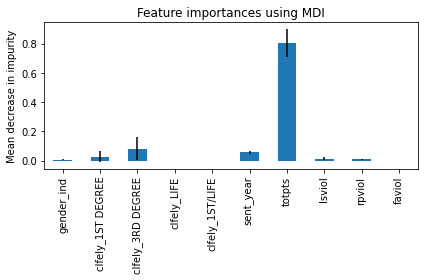

In [73]:
feature_names = [x for x in X.columns]
importances = model_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfc.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [74]:
df_drug_clean['propensity'] = model_rfc.predict_proba(X)[:,1]

In [81]:
df_drug_clean.columns

Index(['Unnamed: 0', 'fstnm', 'lstnm', 'age', 'dob', 'race', 'gender',
       'county', 'totpts', 'judge', 'clfely', 'statut', 'offlvl', 'offdte',
       'sentdte', 'sp_total_days', 'spyrs', 'spmths', 'spdays',
       'cj_total_days', 'cc_total_days', 'pr_total_days', 'enhanc', 'haboff',
       'habvio', 'life', 'vcc', 'prrpact', 'dornum', 'circuit', 'dispos',
       'docket', 'prioff', 'ccimp', 'cjimp', 'spimp', 'primp', 'lsviol',
       'rpviol', 'faviol', 'fips', 'state', 'pop_2010', 'sp_cj_total_days',
       'sent_time_ind', 'gender_ind', 'clfely_1ST DEGREE', 'clfely_1ST/LIFE',
       'clfely_2ND DEGREE', 'clfely_3RD DEGREE', 'clfely_LIFE', 'sent_year',
       'propensity'],
      dtype='object')

In [75]:
df_drug_clean.head()

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,sp_cj_total_days,sent_time_ind,gender_ind,clfely_1ST DEGREE,clfely_1ST/LIFE,clfely_2ND DEGREE,clfely_3RD DEGREE,clfely_LIFE,sent_year,propensity
7,7,DOMINIQUE,GAMBLE,19,1988-04-01,BLACK,MALE,pinellas,65.4,LUCE,...,1825,1,1,0,0,1,0,0,2007,0.978
53,53,JAMES,PANTLE,30,1977-11-18,WHITE,MALE,pinellas,111.8,"BULONE, J.",...,1095,1,1,1,0,0,0,0,2008,1.000
93,93,JOSEPH,JOHNSON,41,1972-10-06,WHITE,MALE,pinellas,113.6,FEDERICO,...,900,1,1,0,0,1,0,0,2014,1.000
127,127,RONNIE,YOUNG,20,1989-10-05,BLACK,MALE,pinellas,71.5,LEY,...,364,0,1,0,0,1,0,0,2010,1.000
154,154,DONJI,FULLER,34,1974-08-30,BLACK,MALE,pinellas,124.0,NEWTON,...,5475,1,1,1,0,0,0,0,2009,1.000


In [76]:
treated = df_drug_clean[df_drug_clean["race"]=="BLACK"].sample(2000)
treated = treated.reset_index(drop=True)
treated.head()

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,sp_cj_total_days,sent_time_ind,gender_ind,clfely_1ST DEGREE,clfely_1ST/LIFE,clfely_2ND DEGREE,clfely_3RD DEGREE,clfely_LIFE,sent_year,propensity
0,398459,KEVIN,WHATLEY,45,1968-09-29,BLACK,MALE,pinellas,197.0,COVERT,...,1080,1,1,0,0,1,0,0,2014,0.974
1,156018,TYRONE,JOHNSON,27,1979-08-16,BLACK,MALE,pinellas,28.2,LEY,...,0,0,1,0,0,1,0,0,2006,0.000
2,841202,PRESTON,BELL,22,1986-03-21,BLACK,MALE,pinellas,55.4,"BULONE, J.",...,616,1,1,0,0,1,0,0,2008,0.940
3,212335,TIMOTHY,WILLIAMS,24,1980-09-05,BLACK,MALE,pinellas,94.7,"FEDERICO, P.",...,1500,1,1,1,0,0,0,0,2005,0.972
4,502528,GREGORY,BOURNE,19,1990-02-14,BLACK,MALE,pinellas,16.2,COVERT,...,90,0,1,0,0,0,1,0,2009,0.000


In [78]:
untreated = df_drug_clean[df_drug_clean["race"]=='WHITE']
matched_control = []
def add_matched_control(patient):
    control_patient =untreated[(untreated["propensity"]>=patient["propensity"]-0.015 )& (untreated["propensity"]<=patient["propensity"]+0.015 )].sample().iloc[0]
    matched_control.append(control_patient)
    
treated.apply(add_matched_control, axis=1)
matched_control_df = pd.DataFrame(matched_control).reset_index(drop=True)
matched_control_df

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,sp_cj_total_days,sent_time_ind,gender_ind,clfely_1ST DEGREE,clfely_1ST/LIFE,clfely_2ND DEGREE,clfely_3RD DEGREE,clfely_LIFE,sent_year,propensity
0,722991,ANN,FRAYNE,33,1973-05-30,WHITE,FEMALE,pinellas,47.5,MCGRADY,...,438,1,0,0,0,0,1,0,2007,0.988000
1,106456,MICHAEL,ROONEY,25,1986-09-28,WHITE,MALE,pinellas,17.2,FARNELL,...,0,0,1,0,0,0,1,0,2012,0.000000
2,1214943,JAMES,SCHUMACHER,38,1971-05-03,WHITE,MALE,pinellas,83.9,"COVERT, T.",...,720,1,1,0,0,0,1,0,2010,0.946000
3,824780,JOHN,RUSSEL,43,1964-01-21,WHITE,MALE,pinellas,79.2,MCGRADY,...,1170,1,1,0,0,0,1,0,2007,0.972000
4,1091638,JOHN,HOSMER,45,1962-09-14,WHITE,MALE,pinellas,30.4,QUESADA,...,159,0,1,0,0,0,1,0,2008,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,938788,CHRISTOPHER,SPERANZA,48,1959-06-04,WHITE,MALE,pinellas,38.4,"QUESADA, F.",...,0,0,1,0,0,0,1,0,2008,0.005333
1996,733003,JASON,NORRIS,27,1977-09-14,WHITE,MALE,pinellas,87.8,BAIRD,...,1345,1,1,1,0,0,0,0,2004,0.996000
1997,1279541,MARGARET,HICKSON,44,1964-04-11,WHITE,FEMALE,pinellas,55.3,HELINGER,...,612,1,0,0,0,0,1,0,2008,0.811200
1998,61152,OCIE,THOMAS,50,1961-05-11,WHITE,FEMALE,pinellas,29.6,QUESADA,...,0,0,0,0,0,0,1,0,2012,0.000000


In [79]:
paired_sample = treated.join(matched_control_df, rsuffix="_control")
paired_sample

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,sp_cj_total_days_control,sent_time_ind_control,gender_ind_control,clfely_1ST DEGREE_control,clfely_1ST/LIFE_control,clfely_2ND DEGREE_control,clfely_3RD DEGREE_control,clfely_LIFE_control,sent_year_control,propensity_control
0,398459,KEVIN,WHATLEY,45,1968-09-29,BLACK,MALE,pinellas,197.0,COVERT,...,438,1,0,0,0,0,1,0,2007,0.988000
1,156018,TYRONE,JOHNSON,27,1979-08-16,BLACK,MALE,pinellas,28.2,LEY,...,0,0,1,0,0,0,1,0,2012,0.000000
2,841202,PRESTON,BELL,22,1986-03-21,BLACK,MALE,pinellas,55.4,"BULONE, J.",...,720,1,1,0,0,0,1,0,2010,0.946000
3,212335,TIMOTHY,WILLIAMS,24,1980-09-05,BLACK,MALE,pinellas,94.7,"FEDERICO, P.",...,1170,1,1,0,0,0,1,0,2007,0.972000
4,502528,GREGORY,BOURNE,19,1990-02-14,BLACK,MALE,pinellas,16.2,COVERT,...,159,0,1,0,0,0,1,0,2008,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,740856,RAYMOND,DAVIS,63,1948-07-18,BLACK,MALE,pinellas,20.2,MEYER,...,0,0,1,0,0,0,1,0,2008,0.005333
1996,450288,RECO,INGRAM,34,1976-04-24,BLACK,MALE,pinellas,76.0,BULONE,...,1345,1,1,1,0,0,0,0,2004,0.996000
1997,381101,RICHARD,BARNES,39,1967-09-24,BLACK,MALE,pinellas,54.8,ALLAN,...,612,1,0,0,0,0,1,0,2008,0.811200
1998,721434,CARVER,WILLIAMS,62,1946-09-02,BLACK,MALE,pinellas,28.8,FARNELL,...,0,0,0,0,0,0,1,0,2012,0.000000


In [82]:
ATE = (paired_sample["sent_time_ind"]-paired_sample["sent_time_ind_control"]).mean()
ATE

-0.004

In [83]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest,confint_proportions_2indep

In [89]:
treat_pos = sum(paired_sample['sent_time_ind'])
treat_pos

535

In [90]:
control_pos = sum(paired_sample['sent_time_ind_control'])
control_pos

543

In [87]:
count = np.array([treat_pos, control_pos])
nobs = np.array([2000, 2000])
stat, pval = proportions_ztest(count, nobs,alternative='two-sided')
print('{0:0.3f}'.format(pval))

0.776


In [88]:
proportions_ztest(count, nobs,alternative='two-sided')

(-0.28508245916471614, 0.7755809682554413)

In [91]:
lower, upper = confint_proportions_2indep(treat_pos, 2000, control_pos, 2000, method=None, compare='diff', alpha=0.05, correction=True)

In [93]:
(lower, upper)

(-0.03148390819341324, 0.02349183097716306)

In [92]:
np.mean([lower,upper])

-0.003996038608125091